# Business problem 



# 0.0 Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Data visualization
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import folium

# 0.1 Reading the data

In [2]:
data = pd.read_csv('datasets/airbnb_ny_2019.csv')

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory Data Analysis

## Checking the columns in the dataset

In [3]:
print(f'The columns of the dataset are: \n {data.columns}' )

The columns of the dataset are: 
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


## Data description
### Rows, columns and data types

In [4]:
print(f' The dataset contains {data.shape[0]} rows and {data.shape[1]} columns' )
print('\n')
print(f'The types of the columns are: \n {data.dtypes}')

 The dataset contains 48895 rows and 16 columns


The types of the columns are: 
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Transforming the data type of column 'last_review' from object to datetime

In [5]:
data['last_review'] = pd.to_datetime(data['last_review'], format = '%Y-%m-%d')

data['last_review'].dtype

dtype('<M8[ns]')

## Checking missing values

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Business Questions

## What are the different accommodations types offered by the hosts?

In [7]:
accommodation = data['room_type'].unique()

print(f' The different accommodations are {accommodation[0]}, {accommodation[1]} and {accommodation[2]}')

 The different accommodations are Private room, Entire home/apt and Shared room


## How many hosts we have in the database?

In [8]:
unique_host = len(data['host_id'].unique())

print(f' The are {unique_host} unique hosts in the database')

 The are 37457 unique hosts in the database


## How is the price variation of accommodations in New York City?

In [9]:
# Calculate the standard deviation for the price column

price_std = np.round(data['price'].std(), 2)
price_mean = np.round(data['price'].mean(), 2)

print(f' The price variation in NYC is U${price_std}, what indicates a wide price range, since the mean price is U${price_mean}')

 The price variation in NYC is U$240.15, what indicates a wide price range, since the mean price is U$152.72


## What is the price distribution? There are more cheap or expensive accommodations?

In [10]:
#plt.figure(figsize = (20,5))
#plt.hist(data['price'], bins=100);

px.histogram(data[data['price'] < 2000], 'price', nbins=50 )

In [11]:
print('There are more properties listing with low cost rent and a few with high cost, as the histogram shows us.')

There are more properties listing with low cost rent and a few with high cost, as the histogram shows us.


## What is the highest price among accommodations avaiable to rent per region?

In [12]:
df1 = data[data['availability_365'] > 0]
data_plot = df1[['neighbourhood_group', 'price']].groupby('neighbourhood_group').max().reset_index()

px.bar(data_plot, x='neighbourhood_group', y='price', title= 'Max rent price per region', text_auto=True)

## Can we know where these accomodations are?

In [13]:
cols = ['neighbourhood_group', 'price', 'latitude', 'longitude' ]

data_map = df1.loc[:, cols].groupby('neighbourhood_group').max().reset_index()

data_map

,neighbourhood_group,price,latitude,longitude
0,Bronx,2500,40.91,-73.78
1,Brooklyn,8000,40.74,-73.86
2,Manhattan,10000,40.88,-73.91
3,Queens,2600,40.80,-73.71
4,Staten Island,5000,40.65,-74.06


In [14]:
map = folium.Map()

for i, c in data_map.iterrows():
    folium.Marker([c['latitude'], c['longitude']]).add_to(map)

map

## Can we identify the accommodations in the map by type of room with different colors?

In [15]:
cols = ['neighbourhood_group', 'room_type', 'latitude', 'longitude' ]

data_map = df1.loc[:, cols].sample( 100 )

data_map['color'] = 'NA'

data_map.loc[data_map['room_type'] == 'Private room', 'color' ] = 'darkgreen'
data_map.loc[data_map['room_type'] == 'Entire home/apt', 'color' ] = 'darkred'
data_map.loc[data_map['room_type'] == 'Shared room', 'color' ] = 'darkblue'

data_map


,neighbourhood_group,room_type,latitude,longitude,color
47003,Brooklyn,Private room,40.65,-73.95,darkgreen
8792,Manhattan,Entire home/apt,40.73,-73.99,darkred
6397,Manhattan,Entire home/apt,40.73,-74.00,darkred
16233,Manhattan,Entire home/apt,40.76,-74.00,darkred
44771,Manhattan,Entire home/apt,40.71,-74.01,darkred
...,...,...,...,...,...
36805,Brooklyn,Private room,40.69,-73.96,darkgreen
3366,Brooklyn,Entire home/apt,40.67,-73.96,darkred
16775,Manhattan,Entire home/apt,40.72,-74.00,darkred
10167,Bronx,Private room,40.88,-73.83,darkgreen


In [16]:
map = folium.Map()

for i, c in data_map.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['neighbourhood_group'],
                    icon=folium.Icon(color = c['color'])).add_to(map)

map

## Exercicios aula 04


### 1 - Desenhe um mapa de NYC, localizando apenas os top 10 moveis com mais avaliações por região

  

In [17]:
cols = ['neighbourhood_group', 'latitude', 'longitude', 'number_of_reviews']

data_map = data.loc[:, cols].sort_values('number_of_reviews', ascending=False).groupby('neighbourhood_group').head(10).reset_index(drop=True)


In [34]:
map = folium.Map(zoom_start=50)

for i, c in data_map.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['neighbourhood_group']).add_to(map)

map

### 2 - Desenhe um mapa de NYC, localizando apenas os top 50 maiores preços 


In [19]:
cols = ['neighbourhood_group', 'latitude', 'longitude', 'price']

data_map = data.loc[:, cols].sort_values('price', ascending=False).head(50).reset_index(drop=True)


In [20]:
map = folium.Map()

for i, c in data_map.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['neighbourhood_group']).add_to(map)

map

### 3 - Desenhe um mapa de NYC, localizando apenas os top 10 menoes preços que não forem iguais a 0, por região



In [21]:
cols = ['neighbourhood_group', 'latitude', 'longitude', 'price']

data_map = data.loc[data['price'] > 0, cols].sort_values('neighbourhood_group').groupby('neighbourhood_group').head(10).reset_index(drop=True)


In [22]:
map = folium.Map()

for i, c in data_map.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['neighbourhood_group']).add_to(map)

map

### 4 - Desenhe um grafico de barras, mostrando a media de aluguel diaria de cada regiao


In [23]:
mean_price_region = data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean().reset_index()
mean_price_region['price'] = np.round(mean_price_region['price'], 2)

px.bar(mean_price_region, x='neighbourhood_group', y='price', text_auto=True, title = 'Mean rent price per region in USD')

### 5 - Desenhe um grafico de barras, mostrando a mediana de aluguel diaria de cada regiao

In [24]:
median_price_region = data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').median().reset_index()

px.bar(median_price_region, x='neighbourhood_group', y='price', title= 'Median rent price per region in USD', text_auto=True)

### 6 - Desenhe um grafico de barras, mostrando a soma de todos os valores de diaria de cada regiaão

In [25]:
sum_price_region = data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').sum().sort_values('price', ascending=False).reset_index()


plt.figure(figsize=(20,10))
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_theme(style="whitegrid")
#sns.barplot(x='neighbourhood_group', y='price', data=sum_price_region);

px.bar(sum_price_region, x='neighbourhood_group', y='price', text_auto=True)

<Figure size 1440x720 with 0 Axes>

### 7 - Desenhe um grafico de barras, mostrando o menor valor diario de diaria de cada região  

In [26]:
min_price_region = df1[['neighbourhood_group', 'price']].groupby('neighbourhood_group').min().sort_values('price').reset_index()

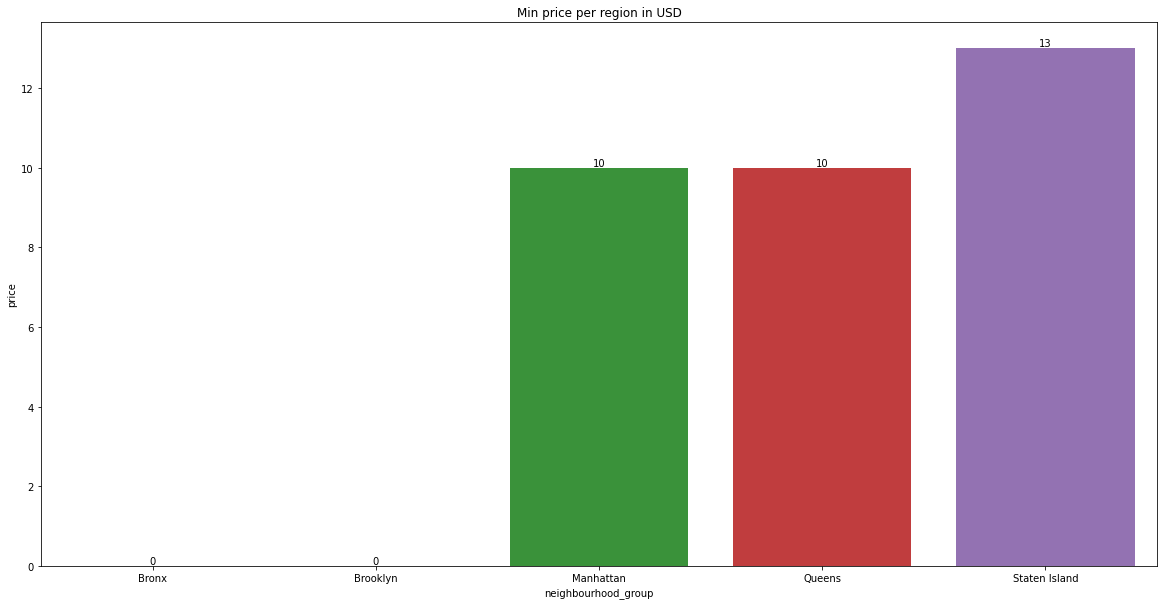

In [42]:
plt.figure(figsize=(20,10))

ax = sns.barplot(x='neighbourhood_group', y='price', data = min_price_region)
ax.set(title = 'Min price per region in USD')


ax.bar_label(ax.containers[0]);
#for i in ax.containers:
#    ax.bar_label(i,)

# What are the properties with the highest rent value and where are they located?

In [44]:
#data.loc[data['price'] == data['price'].max(), ['id', 'neighbourhood_group', 'neighbourhood', 'price']].reset_index(drop=True)
data[data['price'] == data['price'].max()][['id', 'neighbourhood_group', 'neighbourhood', 'price']].reset_index(drop=True)

,id,neighbourhood_group,neighbourhood,price
0,7003697,Queens,Astoria,10000
1,13894339,Brooklyn,Greenpoint,10000
2,22436899,Manhattan,Upper West Side,10000


## Show how many apartments has in each neighbourhood

In [29]:
print(data['neighbourhood_group'].unique())
#print(data[['neighbourhood_group', 'neighbourhood']].groupby('neighbourhood_group').count().sort_values('neighbourhood'))
data['neighbourhood_group'].value_counts(ascending=True)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Staten Island      373
Bronx             1091
Queens            5666
Brooklyn         20104
Manhattan        21661
Name: neighbourhood_group, dtype: int64

## Show the average accommodation price for each neighbourhood 

In [30]:
data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean().reset_index().sort_values('price')

,neighbourhood_group,price
0,Bronx,87.50
3,Queens,99.52
4,Staten Island,114.81
1,Brooklyn,124.38
2,Manhattan,196.88


## Show how many accommodations are in each neighbourhood 

In [31]:
data[['neighbourhood_group', 'neighbourhood', 'id']].groupby(['neighbourhood_group', 'neighbourhood']).count()

id
neighbourhood_group neighbourhood    
Bronx               Allerton       42
                    Baychester      7
                    Belmont        24
                    Bronxdale      19
                    Castle Hill     9
...                                ..
Staten Island       Tottenville     7
                    West Brighton  18
                    Westerleigh     2
                    Willowbrook     1
                    Woodrow         1

[221 rows x 1 columns]

## Make a csv file with the neighbourhood group and neighbourhoods with the count of the numbers of properties in each one

In [32]:
neighbourhoods = data[['neighbourhood_group', 'neighbourhood', 'id']].groupby(['neighbourhood_group', 'neighbourhood']).count().reset_index()
neighbourhoods.rename(columns={'id':'n_accommodation'}, inplace=True)

neighbourhoods.to_csv('datasets/ny_neighbourhoods.csv')